In [40]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
import glob, os, json
import pandas as pd
from helper import *
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
from matplotlib.offsetbox import AnchoredText

In [2]:
np.version.version
print(pd. __version__)

2.2.3


In [59]:
proj_root="/pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5"

In [60]:
#dev_str = 'HOST/rhss-no_sacado'
#dev_dir = os.path.join(proj_root, dev_str)
#json_pattern = os.path.join(str(dev_dir),'wall_*.json')
#cpu_list= glob.glob(json_pattern)

dev_str = 'CUDA/rhss-no_sacado'
dev_dir = os.path.join(proj_root, dev_str)
json_pattern = os.path.join(str(dev_dir),'wall_*.json')
gpu_list= glob.glob(json_pattern)


In [61]:
#cpu = create_dataFrame_cpu(cpu_list)
#cpu_rhs = cpu[cpu.index.str.contains('Aerosol RHSs_')]
#cpu_jacobian = cpu[cpu.index.str.contains('Aerosol Numerical Jacobian_')]

N_GAS_SPEC = 84
N_AERO_SPEC = 5
N_ENV_PARAMS = 3
#cpu_rhs['Problem_size'] = N_ENV_PARAMS + N_GAS_SPEC + N_AERO_SPEC*cpu_rhs.nParticles

gpu = create_dataFrame_gpu(gpu_list)

gpu_rhs = gpu[gpu.index.str.contains('Gas RHSs_')]
gpu_jacobian = gpu[gpu.index.str.contains('Gas Numerical Jacobian_')]
gpu_rhs['Problem_size'] = N_ENV_PARAMS + N_GAS_SPEC #+ N_AERO_SPEC*gpu_rhs.nParticles

Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5/CUDA/rhss-no_sacado/wall_times_nbatch_10_vecsize_2_teamThread_size_512.json: Expected object or value
Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5/CUDA/rhss-no_sacado/wall_times_nbatch_46_vecsize_16_teamThread_size_64.json: Expected object or value
Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5/CUDA/rhss-no_sacado/wall_times_nbatch_1000_vecsize_8_teamThread_size_128.json: Expected object or value
Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5/CUDA/rhss-no_sacado/wall_times_nbatch_464_vecsize_16_teamThread_size_64.json: Expected object or value
Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5/CUDA/rhss-no_sacado/wall_times_nbatch_2_vecsize_16_teamThread_size_64.json: Expected object or value
Unable to read /pscratc

/tmp/ipykernel_1340419/1698321172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpu_rhs['Problem_size'] = N_ENV_PARAMS + N_GAS_SPEC #+ N_AERO_SPEC*gpu_rhs.nParticles


In [45]:
def formatPlotGrid(ax, **kwargs):
    """Helper function for formatting plot grid
    """
    major_lw = kwargs.get('major_lw', 1)
    minor_lw = kwargs.get('minor_lw', 1)
    tick_labelsize = kwargs.get('tick_labelsize', 10)
    ax.grid(which = "major", linewidth = major_lw, axis='y', ls="dotted", dashes=(major_lw,6), c='#414141', alpha=.5)
    ax.grid(which = "minor", linewidth = minor_lw, axis='y', ls="dotted", dashes=(minor_lw,6), c='white')
    ax.grid(which = "minor", linewidth = minor_lw, axis='x', ls="dotted", dashes=(minor_lw,6), c='#414141')
    ax.grid(which = "major", linewidth = major_lw, axis='x', ls="dotted", dashes=(major_lw,6), c='#414141')
    ax.tick_params(axis='both', labelsize=tick_labelsize, which='major', direction='in', top=True, right=True, bottom=True, left=True)
    ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)

Text(0.5, 0, 'Number of samples')

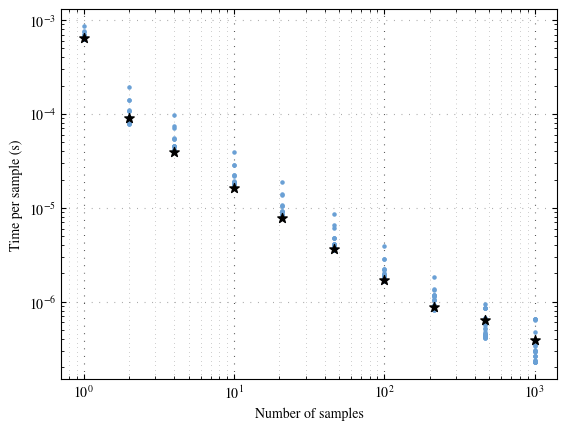

In [62]:
fig, ax = plt.subplots(1, 1)
formatPlotGrid(ax, major_lw=.8, minor_lw=.5)
for s in gpu_rhs.nSamples.unique():
    data = gpu_rhs[(gpu_rhs.nSamples==s)]
    per_sample_wall_times = data.per_sample.values
    ax.scatter([s]*per_sample_wall_times.size, per_sample_wall_times, zorder=3, c='#6AA0D5', s=5)
    
    best_times = gpu_rhs[(gpu_rhs.nSamples==s) & (gpu_rhs.vector_size==8) & (gpu_rhs.team_size==32)].per_sample.values
    ax.scatter(s, best_times, c='k', zorder=4, marker='*', s=50)
    #ax.scatter(s, per_sample_wall_times.min())
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Time per sample (s)')
ax.set_xlabel('Number of samples')


NameError: name 's' is not defined

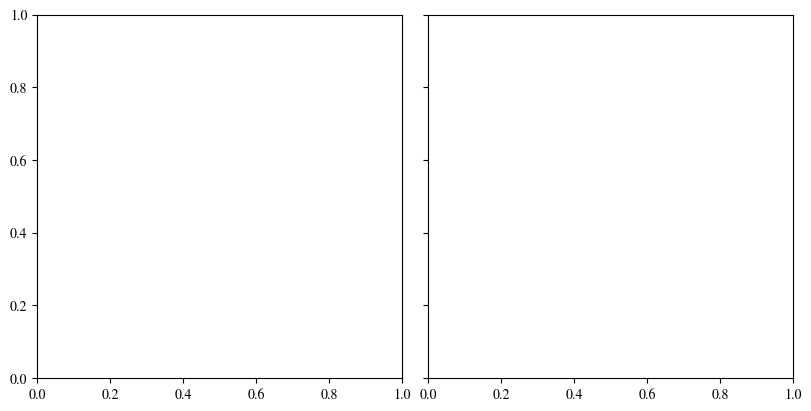

In [16]:
import matplotlib.colors as mcolors
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

cmap = plt.get_cmap('tab10').colors
hex_colors = [mcolors.to_hex(color) for color in cmap]

fig, axs = plt.subplots(1,2, figsize=(8,4), sharey=True, layout='constrained')

colors = ['r', 'g', 'b']
symbols = ['+', 'x']
i = 0
for c, particles in zip(hex_colors, cpu_rhs.nParticles.unique()):

    #for s, threads in zip(symbols, cpu_rhs.nThread.unique()):
    threads = 64
    size = cpu_rhs[(cpu_rhs.nParticles==particles) & (cpu_rhs.nThread==threads)].Problem_size
    time = cpu_rhs[(cpu_rhs.nParticles==particles) & (cpu_rhs.nThread==threads)].per_sample
    axs[0].scatter(size, time, c=c, label=f'$N_p$: {particles:3.0f}, $N_T$: {threads:3.0f}', marker=s)
    
    i += 1

for c, particles in zip(hex_colors, gpu_rhs.nParticles.unique()):
    size = gpu_rhs[(gpu_rhs.nParticles==particles)].Problem_size
    time = gpu_rhs[(gpu_rhs.nParticles==particles)].per_sample
    axs[1].scatter(size, time, c=c, label=f'$N_p$: {particles:3.0f}', marker='o')

for ax in axs.flatten():
    
    ax.set_xlabel('Problem size')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(fontsize=9, ncol=1)
    formatPlotGrid(ax, major_lw=.7, minor_lw=.5, tick_labelsize=10)
    #ax.set_ylim(1e-7, 2e-4)
    #ax.set_xlim(8, 1.3e5)
axs[0].set_title('CPU', fontsize=11)
axs[1].set_title('GPU', fontsize=11)
axs[0].set_ylabel('RHS Compute Time (s)')

In [ ]:
cpu_rhs[(cpu_rhs.nParticles==1) & (cpu_rhs.nThread==64)].nSamples

Aerosol RHSs_1b_64t1p      1.0
Aerosol RHSs_5b_64t1p      5.0
Aerosol RHSs_10b_64t1p    10.0
Aerosol RHSs_20b_64t1p    20.0
Name: nSamples, dtype: float64

Text(0, 0.5, 'RHS Compute Time (s)')

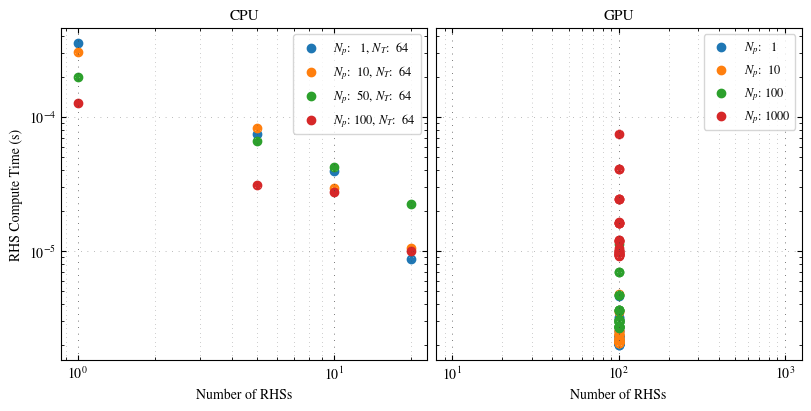

In [ ]:
import matplotlib.colors as mcolors
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

cmap = plt.get_cmap('tab10').colors
hex_colors = [mcolors.to_hex(color) for color in cmap]

fig, axs = plt.subplots(1,2, figsize=(8,4), sharey=True, layout='constrained')

colors = ['r', 'g', 'b']
symbols = ['+', 'x']
i = 0

threads = 64
for c, particles in zip(hex_colors, cpu_rhs.nParticles.unique()):

        
    samples = cpu_rhs[(cpu_rhs.nParticles==particles) & (cpu_rhs.nThread==threads)].nSamples
    time = cpu_rhs[(cpu_rhs.nParticles==particles) & (cpu_rhs.nThread==threads)].per_sample
    axs[0].scatter(samples, time, c=c, label=f'$N_p$: {particles:3.0f}, $N_T$: {threads:3.0f}', marker='o')
        
    i += 1

for c, particles in zip(hex_colors, gpu_rhs.nParticles.unique()):
    samples = gpu_rhs[(gpu_rhs.nParticles==particles)].nSamples
    time = gpu_rhs[(gpu_rhs.nParticles==particles)].per_sample
    axs[1].scatter(samples, time, c=c, label=f'$N_p$: {particles:3.0f}', marker='o')

for ax in axs.flatten():
    
    ax.set_xlabel('Number of RHSs')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(fontsize=9, ncol=1)
    formatPlotGrid(ax, major_lw=.7, minor_lw=.5, tick_labelsize=10)
    #ax.set_ylim(1e-7, 2e-4)
    #ax.set_xlim(8, 1.3e5)
axs[0].set_title('CPU', fontsize=11)
axs[1].set_title('GPU', fontsize=11)
axs[0].set_ylabel('RHS Compute Time (s)')

/tmp/ipykernel_316272/1178222896.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=9, ncol=1)


Text(0, 0.5, 'RHS Compute Time (s)')

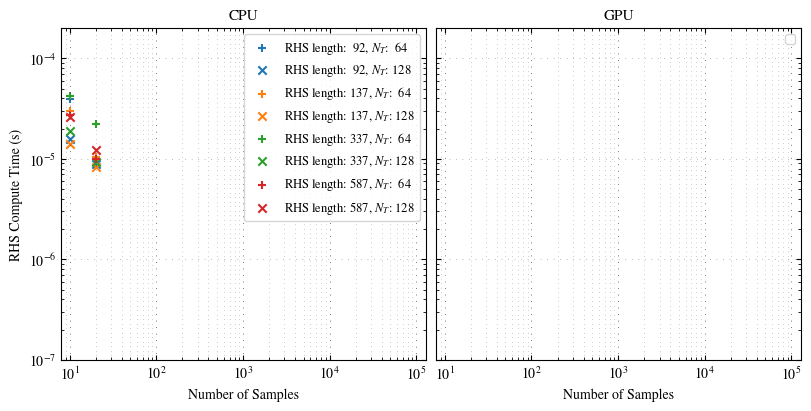

In [ ]:
import matplotlib.colors as mcolors
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

cmap = plt.get_cmap('tab10').colors
hex_colors = [mcolors.to_hex(color) for color in cmap]

fig, axs = plt.subplots(1,2, figsize=(8,4), sharey=True, layout='constrained')

colors = ['r', 'g', 'b']
symbols = ['+', 'x']
i = 0
for c, rhs_len in zip(hex_colors, cpu_rhs.Problem_size.unique()):

    for s, threads in zip(symbols, cpu_rhs.nThread.unique()):
        
        samples = cpu_rhs[(cpu_rhs.Problem_size==rhs_len) & (cpu_rhs.nThread==threads)].nSamples
        time = cpu_rhs[(cpu_rhs.Problem_size==rhs_len) & (cpu_rhs.nThread==threads)].per_sample
        axs[0].scatter(samples, time, c=c, label=f'RHS length: {rhs_len:3.0f}, $N_T$: {threads:3.0f}', marker=s)
        
        i += 1

"""
for c, particles in zip(hex_colors, gpu_rhs.nParticles.unique()):
    samples = gpu_rhs[(gpu_rhs.nParticles==particles)].nSamples
    time = gpu_rhs[(gpu_rhs.nParticles==particles)].per_sample
    axs[1].scatter(samples, time, c=c, label=f'$N_p$: {particles:3.0f}', marker='o')
"""

for ax in axs.flatten():
    
    ax.set_xlabel('Number of Samples')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.legend(fontsize=9, ncol=1)
    formatPlotGrid(ax, major_lw=.7, minor_lw=.5, tick_labelsize=10)
    ax.set_ylim(1e-7, 2e-4)
    ax.set_xlim(8, 1.3e5)
axs[0].set_title('CPU', fontsize=11)
axs[1].set_title('GPU', fontsize=11)
axs[0].set_ylabel('RHS Compute Time (s)')

In [16]:
gpu_rhs

,wall_time,per_sample,nSamples,nBatch,vector_size,team_size,Problem_size
Gas RHSs_10t_2v_2,0.000393,0.000039,10.0,10.0,2.0,2.0,87
Gas RHSs_10t_4v_2,0.000285,0.000029,10.0,10.0,2.0,4.0,87
Gas RHSs_10t_8v_2,0.000227,0.000023,10.0,10.0,2.0,8.0,87
Gas RHSs_10t_16v_2,0.000188,0.000019,10.0,10.0,2.0,16.0,87
Gas RHSs_10t_32v_2,0.000173,0.000017,10.0,10.0,2.0,32.0,87
Gas RHSs_10t_64v_2,0.000166,0.000017,10.0,10.0,2.0,64.0,87
Gas RHSs_10t_128v_2,0.000167,0.000017,10.0,10.0,2.0,128.0,87
Gas RHSs_10t_256v_2,0.000170,0.000017,10.0,10.0,2.0,256.0,87
Gas RHSs_10t_2v_4,0.000298,0.000030,10.0,10.0,4.0,2.0,87
Gas RHSs_10t_4v_4,0.000217,0.000022,10.0,10.0,4.0,4.0,87


In [65]:
vector_sizes = [2, 4, 8, 16, 32]
team_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1023]
n_samples = np.logspace(0, 3, 10).astype(int)
values = np.zeros((n_samples.size, len(vector_sizes), len(team_sizes)))

for s_idx, samples in enumerate(n_samples):
    for i, vector in enumerate(vector_sizes):
        for j, team in enumerate(team_sizes):
            _data = gpu_rhs[(gpu_rhs.vector_size == vector) & (gpu_rhs.team_size == team) & (gpu_rhs.nSamples == samples)]
            if _data.empty:
                values[s_idx, i,j] = np.nan
            else:
                val = _data.loc[:,'per_sample'][0]
                values[s_idx, i,j] = val

/tmp/ipykernel_1340419/4156836005.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = _data.loc[:,'per_sample'][0]


Samples: 1, Minimum: vector size 2, team size 128
Samples: 2, Minimum: vector size 16, team size 16
Samples: 4, Minimum: vector size 2, team size 128
Samples: 10, Minimum: vector size 8, team size 32
Samples: 21, Minimum: vector size 32, team size 8
Samples: 46, Minimum: vector size 2, team size 128
Samples: 100, Minimum: vector size 16, team size 8
Samples: 215, Minimum: vector size 32, team size 2
Samples: 464, Minimum: vector size 32, team size 2
Samples: 1000, Minimum: vector size 16, team size 2


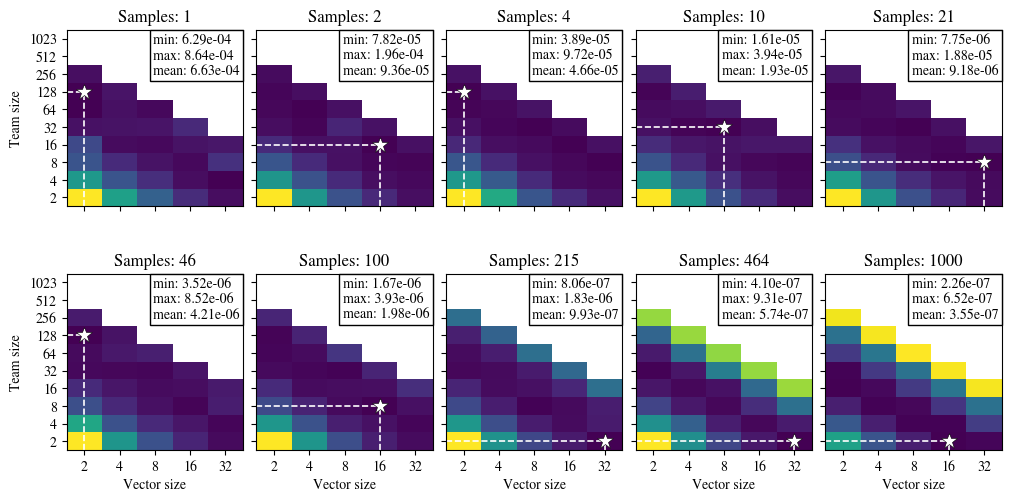

In [76]:
#norm = mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4)
fig, ax = plt.subplots(2,5, figsize=(10, 5), sharey=True, sharex=True, layout='constrained',subplot_kw=dict(box_aspect=1))

#norm = mpl.colors.LogNorm(vmin=np.nanmin(values[:, :]), vmax=np.nanmax(values[:, :]))
for s_idx, (ax, s) in enumerate(zip(ax.flatten(), n_samples)):

    flat_index = np.nanargmin(values[s_idx, :, :])
    v_idx_min, t_idx_min = np.unravel_index(flat_index, values[s_idx, :, :].shape)

    v_min = vector_sizes[v_idx_min]
    t_min = team_sizes[t_idx_min]
    print(f"Samples: {s}, Minimum: vector size {v_min}, team size {t_min}")

    ax.plot([v_idx_min+0.5, v_idx_min+0.5], [0, t_idx_min+0.5], c='white', ls='--', lw=1.2)
    ax.plot([0, v_idx_min+0.5], [t_idx_min+0.5, t_idx_min+0.5], c='white', ls='--', lw=1.2)
    ax.plot(v_idx_min+0.5, t_idx_min+0.5, marker='*', c='white', markersize=12, markeredgecolor='k', markeredgewidth=.4)

    time_min = np.nanmin(values[s_idx, :, :])
    time_max = np.nanmax(values[s_idx, :, :])
    time_mean = np.nanmean(values[s_idx, :, :])
    #ax.text(3, 8, , fontsize=10,
    #        bbox=dict(facecolor='white', edgecolor='black'))

    txt = AnchoredText(f"min: {time_min:3.2e}\nmax: {time_max:3.2e}\nmean: {time_mean:3.2e}",
                        loc='upper right', prop=dict(size=10), frameon=True,
                        bbox_to_anchor=(1., 1.), borderpad=0, pad=0.25,
                        bbox_transform=ax.transAxes
                        )
    ax.add_artist(txt)

    c = ax.pcolormesh(values[s_idx, :, :].T, )#norm=norm)

    ax.set_xticks(np.arange(.5, len(vector_sizes), 1))
    ax.set_xticklabels(vector_sizes)
    

    ax.set_yticks(np.arange(.5, len(team_sizes), 1))
    ax.set_yticklabels(team_sizes)

    if s_idx in (0, 5):
        ax.set_ylabel('Team size')
    if s_idx > 4:
        ax.set_xlabel('Vector size')

    #ax.set_title(f'N particles: {n_particles[pidx]}')
    ax.set_title(f'Samples: {s}')

#cbar = fig.colorbar(c, ax=axs, orientation='horizontal', fraction=0.15, pad=0.1)
#cbar.set_label('Wall time')
#plt.savefig("RHS-timings-team-vs-vector.pdf",  bbox_inches="tight", format='pdf')

Text(0, 0.5, 'Timer per RHS')

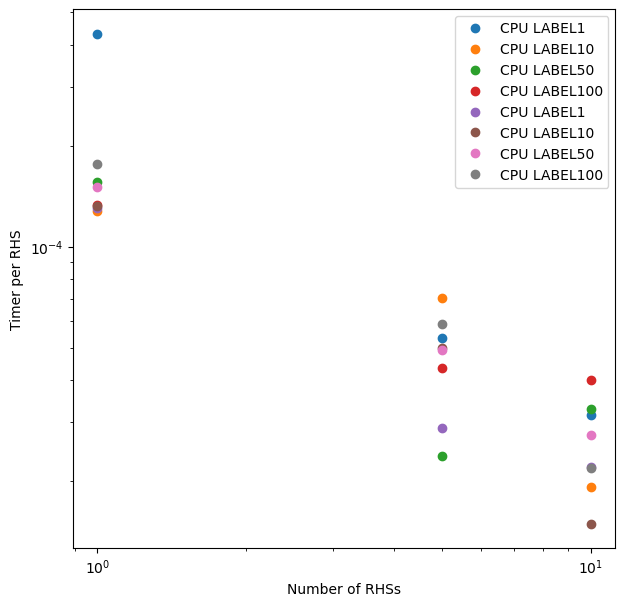

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in cpu_rhs.groupby(['nThread', 'nParticles']):

    label='CPU LABEL' + str(int(name[1]))
    #if name[0] == 100:
    group.plot(ax=axs,
              x='nSamples',
              y='per_sample',
              style='o',logx=True,logy=True,label=label)

"""
# conf_name = {0:'Kokkos::Auto'}
for name, group in volta_rhs.groupby('nParticles'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)
"""

axs.set_xlabel("Number of RHSs")
axs.set_ylabel("Timer per RHS")
#plt.savefig("rhs_cpu_vs_gpu.pdf")

Text(0, 0.5, 'Timer per Jacs')

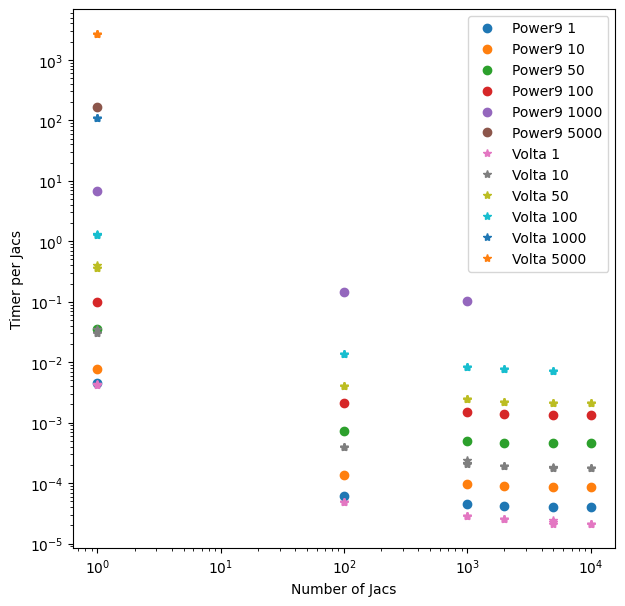

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in cpu_jacobian.groupby(['nThread', 'nParticles']):
  #  print(name)
   label='CPU LABEL ' + str(int(name[1]))
   if name[0] == 160:
    group.plot(ax=axs,
              x='nSamples',
              y='per_sample',
              style='o',logx=True,logy=True,label=label)

# conf_name = {0:'Kokkos::Auto'}
for name, group in volta_jacobian.groupby('nParticles'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)

axs.set_xlabel("Number of Jacs")
axs.set_ylabel("Timer per Jacs")

In [ ]:
# volta_jacobian

,wall_time,per_sample,nSamples,nBatch,vector_size,team_size,nParticles
Aerosol Numerical Jacobian_1t_-1v_-1b_1p,0.004291,0.004291,1.0,1.0,-1.0,-1.0,1.0
Aerosol Numerical Jacobian_1t_-1v_-1b_10p,0.030500,0.030500,1.0,1.0,-1.0,-1.0,10.0
Aerosol Numerical Jacobian_1t_-1v_-1b_50p,0.360912,0.360912,1.0,1.0,-1.0,-1.0,50.0
Aerosol Numerical Jacobian_1t_-1v_-1b_100p,1.301249,1.301249,1.0,1.0,-1.0,-1.0,100.0
Aerosol Numerical Jacobian_1t_-1v_-1b_1000p,109.980016,109.980016,1.0,1.0,-1.0,-1.0,1000.0
...,...,...,...,...,...,...,...
Aerosol Numerical Jacobian_10000t_2v_-1b_10p,1.805662,0.000181,10000.0,10000.0,-1.0,2.0,10.0
Aerosol Numerical Jacobian_10000t_2v_-1b_50p,20.804890,0.002080,10000.0,10000.0,-1.0,2.0,50.0
Aerosol Numerical Jacobian_10000t_4v_-1b_1p,0.214710,0.000021,10000.0,10000.0,-1.0,4.0,1.0
Aerosol Numerical Jacobian_10000t_4v_-1b_10p,1.806983,0.000181,10000.0,10000.0,-1.0,4.0,10.0


Text(0, 0.5, 'Timer per RHS')

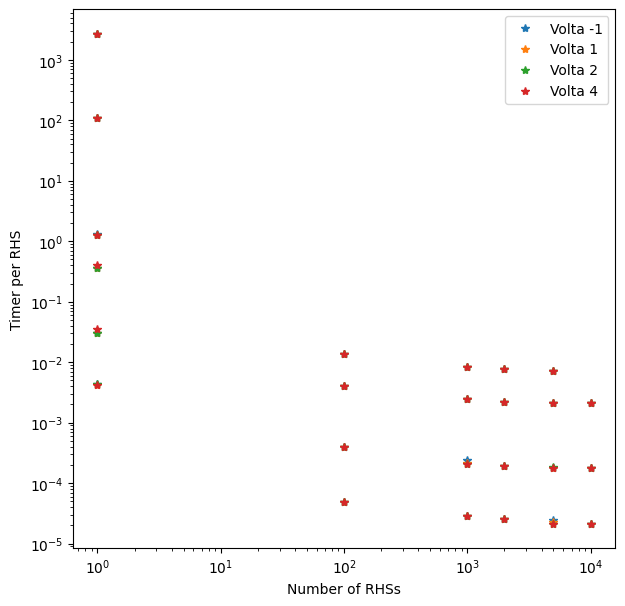

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
for name, group in volta_jacobian.groupby('team_size'):
  # label='Volta ' + conf_name[name]
  label='Volta ' + str(int(name))
  group.plot(ax=axs,
             x='nSamples',
             y='per_sample',style='*',
             logx=True,logy=True,label=label)

axs.set_xlabel("Number of RHSs")
axs.set_ylabel("Timer per RHS")

In [ ]:
# t1 = volta.groupby('nParticles')

In [ ]:
# for name, group in volta.groupby('nParticles'):
#   print(group)

In [ ]:
# cpu